In [ ]:
library(rvest)     
library(dplyr)     
library(janitor)
library(ggplot2)   
library(stringr)
library(plotly)
library(purrr)


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [ ]:
url <- "https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"
league_avgs <- url |>
  read_html() |>
  html_element("table") |>
  html_table(fill = TRUE)    
league_avgs <- league_avgs |>
  row_to_names(row_number = 1) |> 
  clean_names()            
league_avgs <- league_avgs %>% 
  mutate(season = as.character(season))

league_avgs <- league_avgs %>%
  mutate(start_year = as.numeric(str_sub(season, 1, 4))) %>%
  filter(start_year >= 1979) %>%
  select(-start_year)  



Warning message:
There was 1 warning in `mutate()`.
ℹ In argument: `start_year = as.numeric(str_sub(season, 1, 4))`.
Caused by warning:
! NAs introduced by coercion 


In [19]:
print(league_avgs, n =50)

# A tibble: 47 × 33
   rk    season lg    age   ht    wt    g     mp    fg    fga   x3p   x3pa  ft    fta   orb   drb   trb   ast   stl   blk   tov   pf   
   <chr> <fct>  <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 1     2025-… NBA   26.4  6-7   216   140   241.4 41.7  89.0  13.3  37.0  20.3  25.7  11.6  32.5  44.1  26.5  8.6   4.7   15.4  22.0 
 2 2     2024-… NBA   26.3  6-7   215   1230  241.3 41.7  89.2  13.5  37.6  16.9  21.7  11.1  33.0  44.1  26.5  8.2   4.9   14.3  18.6 
 3 3     2023-… NBA   26.4  6-7   216   1230  241.4 42.2  88.9  12.8  35.1  17.0  21.7  10.6  33.0  43.5  26.7  7.5   5.1   13.6  18.7 
 4 4     2022-… NBA   26.1  6-6   216   1230  241.8 42.0  88.3  12.3  34.2  18.4  23.5  10.4  33.0  43.4  25.3  7.3   4.7   14.1  20.0 
 5 5     2021-… NBA   26.1  6-6   215   1230  241.4 40.6  88.1  12.4  35.2  16.9  21.9  10.3  34.1  44.5  24.6  7.6   4.7   13.8  19.6 
 6 6     2020-… NBA   26.1  

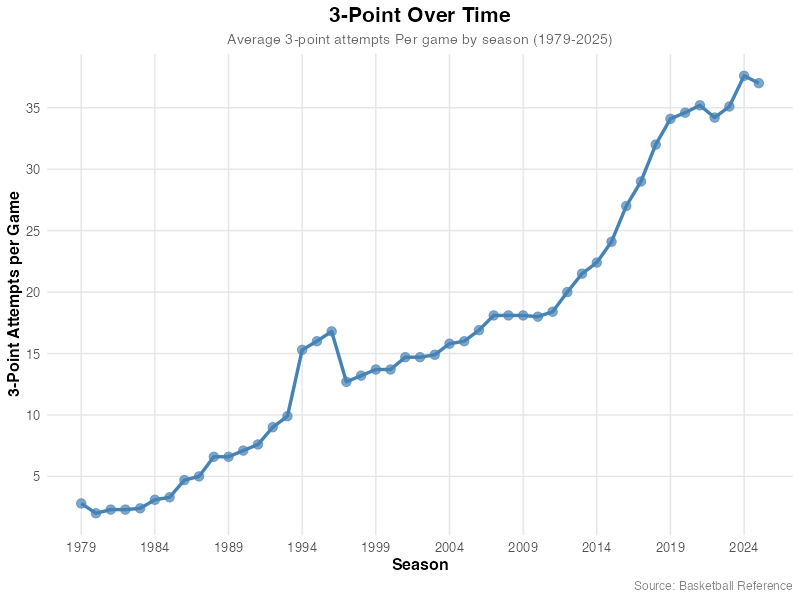

In [30]:
league_avgs <- league_avgs %>%
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3pa_num = as.numeric(x3pa))

ggplot(data = league_avgs, aes(x = start_year, y = x3pa_num)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "steelblue", size = 3, alpha = 0.7) +
  labs(
    title = "3-Point Over Time",
    subtitle = "Average 3-point attempts Per game by season (1979-2025)",
    x = "Season",
    y = "3-Point Attempts per Game",
    caption = "Source: Basketball Reference"
  ) +
  scale_y_continuous(breaks = seq(0, 40, 5)) +
  scale_x_continuous(breaks = seq(1979, 2025, 5)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    plot.caption = element_text(size = 9, color = "gray50"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray90")
  )

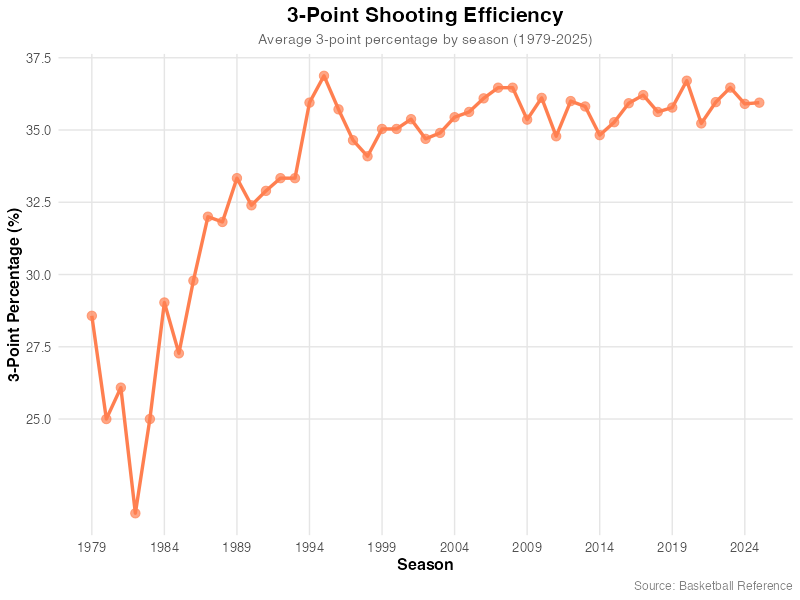

In [60]:
league_avgs <- league_avgs |>
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3p_num = as.numeric(x3p),
         x3pa_num = as.numeric(x3pa),
         x3p_pct = (x3p_num / x3pa_num) * 100)

ggplot(data = league_avgs, aes(x = start_year, y = x3p_pct)) +
  geom_line(color = "coral", size = 1.2) +
  geom_point(color = "coral", size = 3, alpha = 0.7) +
  labs(
    title = "3-Point Shooting Efficiency",
    subtitle = "Average 3-point percentage by season (1979-2025)",
    x = "Season",
    y = "3-Point Percentage (%)",
    caption = "Source: Basketball Reference"
  ) +
  scale_y_continuous(breaks = seq(25, 40, 2.5)) +
  scale_x_continuous(breaks = seq(1979, 2025, 5)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    plot.caption = element_text(size = 9, color = "gray50"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray90")
  )

In [ ]:
league_avgs <- league_avgs |>
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3pa_num = as.numeric(x3pa)) |>
  arrange(start_year)
five_year_changes <- league_avgs |>
  mutate(x3pa_5yr_ago = lag(x3pa_num, 5),
         five_year_change = x3pa_num - x3pa_5yr_ago,
         five_year_pct_change = (five_year_change / x3pa_5yr_ago) * 100,
         period = paste(start_year - 5, "-", start_year)) |>
  filter(!is.na(five_year_change)) |>
  select(start_year, period, x3pa_num, x3pa_5yr_ago, five_year_change, five_year_pct_change)
biggest_increase <- five_year_changes |>
  arrange(desc(five_year_change)) |>
  slice(1)
print("5-Year Changes in 3PA:")
print(five_year_changes)
print("\nBiggest 5-Year Increase:")
print(biggest_increase)
cat("\n\nSummary of 5-Year Changes:\n")
cat("Biggest absolute increase:", biggest_increase$five_year_change, "attempts\n")
cat("Period:", biggest_increase$period, "\n")
cat("From", biggest_increase$x3pa_5yr_ago, "to", biggest_increase$x3pa_num, "attempts per game\n")

[1] "5-Year Changes in 3PA:"
# A tibble: 42 × 6
   start_year period      x3pa_num x3pa_5yr_ago five_year_change five_year_pct_change
        <dbl> <chr>          <dbl>        <dbl>            <dbl>                <dbl>
 1       1984 1979 - 1984      3.1          2.8            0.300                 10.7
 2       1985 1980 - 1985      3.3          2              1.3                   65  
 3       1986 1981 - 1986      4.7          2.3            2.4                  104. 
 4       1987 1982 - 1987      5            2.3            2.7                  117. 
 5       1988 1983 - 1988      6.6          2.4            4.2                  175  
 6       1989 1984 - 1989      6.6          3.1            3.5                  113. 
 7       1990 1985 - 1990      7.1          3.3            3.8                  115. 
 8       1991 1986 - 1991      7.6          4.7            2.9                   61.7
 9       1992 1987 - 1992      9            5              4                     80  
10    

In [ ]:
seasons <- 2015:2019
urls <- paste0("https://www.basketball-reference.com/leagues/NBA_", seasons, ".html")

scrape_per_game <- function(url) {
  url |>
    read_html() |>
    html_element("table#per_game-team") |>
    html_table(fill = TRUE) |>
    clean_names() |>
    mutate(season = gsub("NBA_|\\.html", "", basename(url)))
}

nba_team_stats <- map_dfr(urls, scrape_per_game)  


Warriors won the most games. Let us analyze the winnigest team and their players. Go to steph/ visualize his shot making 